In [21]:
import pandas as pd 
import numpy as np
from utils import *
import time
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
from stock_assess import *
%matplotlib inline

In [26]:
df = pd.read_csv('./data/CONTEST_DATA_IN_SAMPLE_FULL.csv')
price = df[['date','asset','close']]
price.columns = ['date','asset','adjclose']

In [8]:
df = pd.read_csv('./data/CONTEST_DATA_IN_SAMPLE_FULL.csv')
price = df[['date','asset','close']]
price.columns = ['date','asset','adjclose']

df.columns = ['time','stkcd','open','high','low','close','volume']

close_df = pd.DataFrame()
high_df = pd.DataFrame()
low_df = pd.DataFrame()
volume_df = pd.DataFrame()
for sub_df in df.groupby('stkcd'):
    close_df[sub_df[0]] = sub_df[1].reset_index().close
    high_df[sub_df[0]] = sub_df[1].reset_index().high
    low_df[sub_df[0]] = sub_df[1].reset_index().low
    volume_df[sub_df[0]] = sub_df[1].reset_index().volume
highs = high_df.values
lows = low_df.values
closes = close_df.values
volumes = volume_df.values

In [9]:
horizon = 1
rts = close_df.pct_change(horizon).shift(-horizon-1).fillna(0).values # returns

In [4]:
avgs = np.empty((0,closes.shape[1]))
moms = np.empty((0,closes.shape[1]))
vols = np.empty((0,closes.shape[1]))
max52s = np.empty((0,closes.shape[1]))
min52s = np.empty((0,closes.shape[1]))
ccis = np.empty((0,closes.shape[1]))
Ks = np.empty((0,closes.shape[1]))
Ds = np.empty((0,closes.shape[1]))
Js = np.empty((0,closes.shape[1]))
rsis = np.empty((0,closes.shape[1]))
trixs = np.empty((0,closes.shape[1]))
willrs = np.empty((0,closes.shape[1]))
macds = np.empty((0,closes.shape[1]))
natrs = np.empty((0,closes.shape[1]))
mfis = np.empty((0,closes.shape[1]))
start = time.time()
for i in range(1,len(closes)+1):
    c = closes[:i]
    h = highs[:i]
    l = lows[:i]
    v = volumes[:i]
    avg=get_avg(c,3)
    mom=get_mom(c,5)
    vol=get_vol(c,5)
    max52=get_52weekhigh(c)
    min52=get_52weeklow(c)
    cci = get_cci(h,l,c)
    K,D,J = get_kdj(h,l,c)
    rsi = get_rsi(c)
    trix = get_trix(c)
    willr = get_willr(h,l,c)
    macd = get_macd(c)
    natr = get_natr(h,l,c)
    mfi = get_mfi(c,h,l,v)

    avgs=np.vstack([avgs,avg])
    moms=np.vstack([moms,mom])
    vols=np.vstack([vols,vol])
    max52s=np.vstack([max52s,max52])
    min52s=np.vstack([min52s,min52])
    ccis=np.vstack([ccis,cci])
    Ks=np.vstack([Ks,K])
    Ds=np.vstack([Ds,D])
    Js=np.vstack([Js,J])
    rsis=np.vstack([rsis,rsi])
    trixs=np.vstack([trixs,trix])
    willrs=np.vstack([willrs,willr])
    macds=np.vstack([macds,macd])
    natrs=np.vstack([natrs,natr])
    mfis=np.vstack([mfis,mfi])
    if i%100 == 0:
        print(i)
endtime = time.time()
# print((start-endtime)*1000 / 1900)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [5]:
def get_weights(factors,top_n=10,tail_n=10,reverse=False):
    weights = np.empty((factors.shape))
    for i,daily_factor in enumerate(factors):
        daily_factor = pd.Series(daily_factor)
        head = daily_factor.nlargest(top_n).index.tolist()
        tail = daily_factor.nsmallest(tail_n).index.tolist()
        weight = np.zeros(factors.shape[1])
        weight[head] = 1 / len(head)
        weight[tail] = -1 / len(tail)
        if reverse:
            weight = -1 * weight
        weights[i] = weight
    return weights

def get_pnl_by_factors(factors,price,top_n=10,tail_n=10,reverse=True):
    factor_w = get_weights(factors,top_n=top_n,tail_n=tail_n,reverse=reverse)
    factor_weight = pd.DataFrame(factor_w).stack().reset_index()
    factor_weight.columns=['date','asset','weight']
    factor_weight['asset'] += 1000
    result=backtest(factor_weight,price,bench_code='000905.SH')
    return result['Performance']['PtfRet'].values

In [28]:
rsi_rs = get_pnl_by_factors(rsis,price)

In [29]:
rsi_rs.shape

(1898,)

In [30]:

factor_pnl['rsi'] = rsi_rs

In [11]:
factor_pnl = pd.DataFrame()
factor_pnl['avg'] = get_pnl_by_factors(avgs,price)
factor_pnl['mom'] = get_pnl_by_factors(moms,price)
factor_pnl['vol'] = get_pnl_by_factors(vols,price,reverse=False)
factor_pnl['max52'] = get_pnl_by_factors(max52s,price)
factor_pnl['min52'] = get_pnl_by_factors(min52s,price)
factor_pnl['min52'] = get_pnl_by_factors(min52s,price)
factor_pnl['cci'] = get_pnl_by_factors(ccis,price)
factor_pnl['rsi'] = get_pnl_by_factors(rsis,price)
factor_pnl['K'] = get_pnl_by_factors(Ks,price)
factor_pnl['D'] = get_pnl_by_factors(Ds,price)
factor_pnl['J'] = get_pnl_by_factors(Js,price,reverse=False)
factor_pnl['trix'] = get_pnl_by_factors(trixs,price)
factor_pnl['willr'] = get_pnl_by_factors(willrs,price,reverse=False)
factor_pnl['macd'] = get_pnl_by_factors(macds,price)
factor_pnl['natr'] = get_pnl_by_factors(natrs,price,reverse=False)
factor_pnl['mfi'] = get_pnl_by_factors(mfis,price)

In [36]:
print(factor_pnl.columns.to_list())

['avg', 'mom', 'vol', 'max52', 'min52', 'cci', 'K', 'D', 'J', 'trix', 'willr', 'macd', 'natr', 'mfi', 'rsi']


In [37]:
factor_pnl.mean()

avg      0.002253
mom      0.002645
vol      0.001155
max52    0.001282
min52   -0.000476
cci     -0.000845
K        0.001345
D        0.001492
J        0.000568
trix     0.000868
willr    0.000992
macd     0.000459
natr     0.001520
mfi      0.000407
rsi      0.001395
dtype: float64

In [38]:
factor_pnl.corr()

,avg,mom,vol,max52,min52,cci,K,D,J,trix,willr,macd,natr,mfi,rsi
avg,1.000000,-0.047983,0.174003,0.233278,0.109686,-0.001400,0.061795,0.087725,-0.036947,0.107300,0.047082,-0.047217,0.189197,-0.039598,0.076575
mom,-0.047983,1.000000,-0.134655,0.219507,0.223601,-0.005468,0.251730,0.246629,0.019216,0.175792,0.285115,0.175038,0.063129,0.073007,0.192400
vol,0.174003,-0.134655,1.000000,0.316767,-0.143135,0.039282,-0.031096,-0.012365,-0.050936,0.099935,0.006667,0.150522,0.537957,-0.002950,-0.159776
max52,0.233278,0.219507,0.316767,1.000000,0.188154,-0.018264,0.120751,0.180746,-0.063361,0.385689,0.145900,0.235903,0.467137,0.009842,0.059373
min52,0.109686,0.223601,-0.143135,0.188154,1.000000,-0.025947,0.132447,0.159301,-0.035922,0.242172,0.189058,0.061438,-0.158076,0.046961,0.192693
cci,-0.001400,-0.005468,0.039282,-0.018264,-0.025947,1.000000,-0.048075,-0.051572,0.001554,-0.059242,0.009142,-0.070635,0.033275,-0.022230,-0.061811
K,0.061795,0.251730,-0.031096,0.120751,0.132447,-0.048075,1.000000,0.598258,-0.039806,0.124397,0.371570,0.098902,0.029824,0.113707,0.168747
D,0.087725,0.246629,-0.012365,0.180746,0.159301,-0.051572,0.598258,1.000000,-0.182252,0.184180,0.263612,0.172054,0.013258,0.090913,0.196914
J,-0.036947,0.019216,-0.050936,-0.063361,-0.035922,0.001554,-0.039806,-0.182252,1.000000,-0.128450,0.059839,-0.137034,0.030016,-0.020444,-0.021526
trix,0.107300,0.175792,0.099935,0.385689,0.242172,-0.059242,0.124397,0.184180,-0.128450,1.000000,0.079505,0.367238,0.209663,0.076150,0.137339


['avg', 'mom', 'vol', 'max52', 'min52', 'cci', 'K', 'D', 'J', 'trix', 'willr', 'macd', 'natr', 'mfi', 'rsi']
6.43946451554608


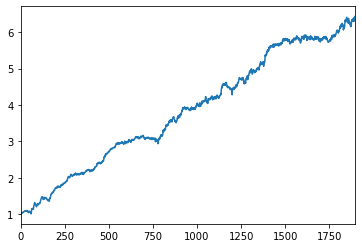

In [41]:
select = (factor_pnl[factor_select].mean(axis=1)+1).cumprod()
select.plot()
print(factor_select)
print(select.iloc[-1])

In [43]:
factor_select = ['avg', 'mom', 'max52', 'K', 'D', 'J', 'trix', 'willr', 'macd', 'natr', 'mfi', 'rsi']

['avg', 'mom', 'max52', 'K', 'D', 'J', 'trix', 'willr', 'macd', 'natr', 'mfi', 'rsi']
10.547465156150178


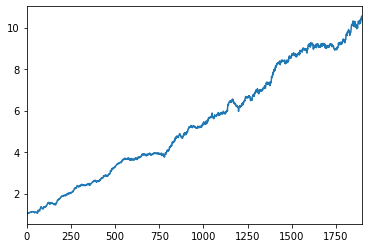

In [44]:
select = (factor_pnl[factor_select].mean(axis=1)+1).cumprod()
select.plot()
print(factor_select)
print(select.iloc[-1])

['avg', 'mom', 'max52', 'D', 'willr', 'natr', 'rsi']
21.245697255866844


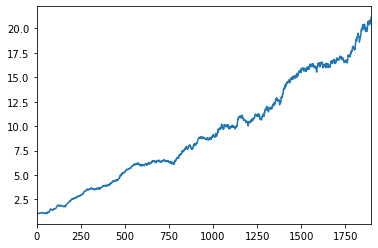

In [48]:
factor_select = ['avg', 'mom', 'max52', 'D', 'willr', 'natr', 'rsi']
select = (factor_pnl[factor_select].mean(axis=1)+1).cumprod()
select.plot()
print(factor_select)
print(select.iloc[-1])

['avg', 'mom', 'max52', 'D', 'trix', 'willr', 'natr', 'mfi', 'rsi']
14.009131010041243


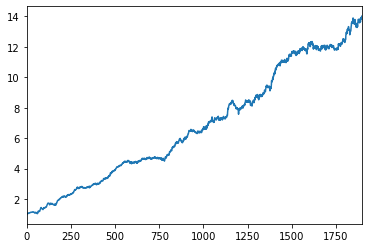

In [46]:
factor_select = ['avg', 'mom', 'max52', 'D', 'trix', 'willr', 'natr', 'mfi', 'rsi']
select = (factor_pnl[factor_select].mean(axis=1)+1).cumprod()
select.plot()
print(factor_select)
print(select.iloc[-1])

In [33]:
(factor_pnl.iloc[1100:]+1).cumprod()

,avg,mom,vol,max52,min52,cci,K,D,J,trix,willr,macd,natr,mfi,rsi
1100,1.015502,1.056144,0.943988,1.007295,0.986411,1.010255,1.020796,1.008603,1.017711,0.973094,1.024465,0.992015,1.010858,0.996969,0.993441
1101,1.018449,1.055633,0.937170,1.005669,0.980661,1.001124,1.024510,1.008905,1.012326,0.963442,1.012198,0.993921,1.013089,1.000151,1.011301
1102,1.001391,1.054690,0.946493,1.025792,1.003725,1.004553,1.017418,1.002978,1.007715,0.975751,1.028479,0.994296,1.007760,0.998967,1.017398
1103,1.025658,1.065749,0.954082,1.022227,1.000051,1.004464,1.021991,1.012508,1.018818,0.984431,1.022245,0.991703,1.001576,0.988224,1.009282
1104,1.037060,1.065991,0.936000,1.010122,0.988984,0.997166,1.025128,1.013245,1.027089,0.951461,1.027370,0.992576,0.989368,0.991953,0.997731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,3.906023,1.782885,2.035219,1.295330,0.357764,0.534517,1.616852,1.850510,1.233340,0.897911,1.404685,1.296406,3.305452,1.697446,1.493180
1894,3.939648,1.817345,2.065558,1.301107,0.357705,0.534370,1.646322,1.884186,1.251344,0.911353,1.386412,1.290109,3.313800,1.696317,1.495032
1895,3.983769,1.809294,2.059720,1.291722,0.362744,0.528584,1.707541,1.921976,1.262840,0.859731,1.425782,1.271511,3.306214,1.704886,1.525196
1896,3.969253,1.833075,2.060247,1.291649,0.357959,0.523750,1.717919,1.903701,1.279060,0.870199,1.435770,1.260429,3.351143,1.666934,1.520150


In [19]:
factor_pnl['cci'] = get_pnl_by_factors(ccis,price,reverse=False)